# Generative Adversarial Networks (GANs): Introduction & MNIST Generation

I made these notes following the course by J.M. Portilla ['Complete Tensorflow 2 and Keras Deep Learning Bootcamp'](https://www.udemy.com/course/complete-tensorflow-2-and-keras-deep-learning-bootcamp/) and the following video by Luis Serrano:

[A Friendly Introduction to Generative Adversarial Networks (GANs)](https://www.youtube.com/watch?v=8L11aMN5KY8).

Generative Adversarial Networks (GANs) were introduced by Ian Goodfellow and colleagues in 2014.
They consist of two networks that compete with each other:
- The **Generator** `G()` network learns to generate fake but realistic/meaningful data from a `z` noise input. Its output is of the size of a data sample (often an image).
- The **Discriminator** `D()` network learns to distinguish between fake and real data. Its output is 1 (real) or 0 (fake).

Some notes on the notation:
- The noise is `z` (Gaussian).
- The Generator produces `G(z)`.
- The discriminator takes that `G(z)` as fake input (as well as real samples) and produces `D(G(z))`, which should be real (1) even for fake (0) samples (e.g., images) at the end.

The final goal of a GAN is to train both networks together as if they are competing; then, **the resulting Generator G() is able to create very realistic fake data (e.g., face images)**.

To that end, the training works in two Phases which can be repeated one after the other several times (for a few epochs):
- Phase 1: The Discriminator is trained to distinguish fake vs real
    - We generate a dataset of real images labelled as 1 and fake images generated by the Generator (with `z` noise inputs) labelled as 0.
    - The binary classification Discriminator is trained: first real samples can be used for N epochs, then fake samples.
    - Backpropagation and weight update occurs on the Discriminator.
    - As a result, the Discriminator learns to distinguish fake vs real.
- Phase 2: The Generator is trained to fool the Discriminator
    - We produce more fake images with `G()` and feed them to the Discriminator `D()` **but labelled as 1 (real)**.
    - We have a fake sample labelled as real: `D(G(z))` will probably yield something close to 'fake' or `0`, but we expect `1` or 'real'; we compute our loss according to our expectation and use it to update the weiughts of the Generator.
    - Backpropagation and weight update occurs on the Generator.
    - As a result, the Generator is trained to produce realistic fake samples that are classified as real by the Discriminator after a successful training.

While training phases continue one after the other, both the Generator and Discriminator get better at their jobs.

**Figure 1: Discriminator D() fed by fake images by the Generator G()**: A noise input `z` is used to generate a fake sample; then, that fake sample is fed to a Discriminator. Credits by Luis Serrano (see link above).
![Discriminator D() fed by fake images by the Generator G()](./pics/GAN_LuisSerrano_Fake.png)

**Figure 2: Discriminator D() fed with real images**: A real image is fed to Discriminator. Credits by Luis Serrano (see link above).
![Discriminator D() fed with real images](./pics/GAN_LuisSerrano_Real.png)

**Figure 3: Phase 2: Discriminator D() fed by fake images from the Generator G(), but fooled to expect real samples**: The loss function applied to the Generator is `-ln(D(G(z)))`. Credits by Luis Serrano (see link above).
![Discriminator D() fed by fake images by the Generator G()](./pics/GAN_LuisSerrano_Training_Error.png)

### Difficulties with GANs

**Training resources**: GANs are often used for images; training on them requires powerful GPUs. We could use Gooogle Colab, since it offers GPUs for free.

**Mode collapse**: The Generator ends up producing a single image that always fools the Discriminator, independently of the noise input. There are several approaches to overcome the issue:
- Deep Convolutional GANs (DCGANs).
- Mini-batch discrimination: generated batches that contain similar images are punished.

**Instability**: It is sometimes difficult to evaluate performance and decide the necessary epochs, since all our images are fake. Additionally, since both `G()` and `D()` are competing, their performance score might start oscillating, which is not desired. Therefore, hyperparameter tuning is essential.

## Loss Functions

This is a very simple section in which I plot the loss functions of the Generator and the Discriminator. Recall that in the Phase 2 we feed fake samples to the Discriminator labelled as real.

The loss function `-ln(x)` performs an inverse mapping: small `x` values (close to 0) become large ones and large `x` values (close to 1) become small ones.

Thus, when the Discriminator determines that the fake sample is fake (against its label), the loss applied to the Generator is big; otherwise, the loss is small.

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Discriminator')

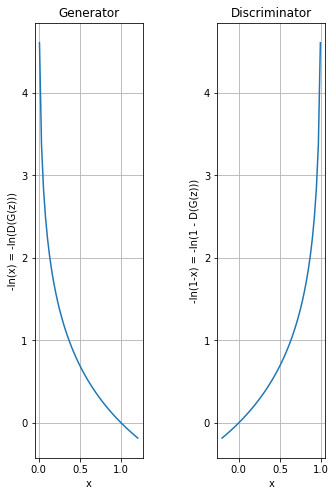

In [80]:
# Both loss functions are plotted
fig = plt.figure(figsize=(6,8))
sub1 = fig.add_subplot(1,2,1)
x = np.linspace(0.01,1.2,50)
y = -np.log(x)
sub1.plot(x,y)
sub1.grid(True)
sub1.set_aspect('equal','box')
sub1.set_xlabel('x')
sub1.set_ylabel('-ln(x) = -ln(D(G(z)))')
sub1.set_title('Generator')
sub2 = fig.add_subplot(1,2,2)
x = np.linspace(-0.2,0.99,50)
y = -np.log(1-x)
sub2.plot(x,y)
sub2.grid(True)
sub2.set_aspect('equal','box')
sub2.set_xlabel('x')
sub2.set_ylabel('-ln(1-x) = -ln(1 - D(G(z)))')
sub2.set_title('Discriminator')

## Exmaple with the MNIST Dataset

### Dataset

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
from tensorflow.keras.datasets import mnist

In [78]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

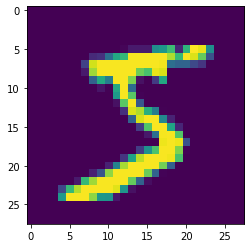

In [79]:
plt.imshow(X_train[0])

In [85]:
# We take only images with 0 numbers to make it easier
# Also, the number 0 is quite distinct
# However, we could choose any number
number = 0
only_zeros = X_train[y_train==number]

In [86]:
only_zeros.shape

(5923, 28, 28)

In [87]:
X_train.shape

(60000, 28, 28)

### GAN Model